# Project 2: Data Representations and Clustering 

### Part 1 - Clustering on Text Data

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
import random

np.random.seed(0)
random.seed(0)

categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 
              'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 
              'rec.sport.hockey']

newsgroup_data = fetch_20newsgroups(subset = 'all',categories = categories, 
                                    remove = ('headers', 'footers', 'quotes'))


# Create a CountVectorizer object with your desired parameters
tfidf_vectorizer = CountVectorizer(stop_words = 'english', min_df = 3)

# Fit and transform the text data using the CountVectorizer
tfidf_data = tfidf_vectorizer.fit_transform(newsgroup_data.data)

# Create a TfidfTransformer object
tfidf_transformer = TfidfTransformer()

# Apply the TfidfTransformer to the TF-IDF vectors
tfidf_vectors = tfidf_transformer.fit_transform(tfidf_data)

# Print TF-IDF matrix dimensions
print('TF-IDF Matrix Dimensions: ', tfidf_vectors.shape)

TF-IDF Matrix Dimensions:  (7882, 18469)


In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Calculate K Means
kmeans = KMeans(n_clusters = 2, random_state = 0, max_iter = 1000, n_init = 30, init='k-means++')
kmeans.fit(tfidf_vectors)

KMeans(max_iter=1000, n_clusters=2, n_init=30, random_state=0)

In [3]:
# Index categories from 0 to 7
for i, target_name in enumerate(newsgroup_data.target_names):
    print(f"{target_name}: target index = {i}")

comp.graphics: target index = 0
comp.os.ms-windows.misc: target index = 1
comp.sys.ibm.pc.hardware: target index = 2
comp.sys.mac.hardware: target index = 3
rec.autos: target index = 4
rec.motorcycles: target index = 5
rec.sport.baseball: target index = 6
rec.sport.hockey: target index = 7


In [4]:
# Initialize labels array
labels = np.zeros_like(newsgroup_data.target)

# Assign labels for Class 1 (Computer Tech)
labels[np.isin(newsgroup_data.target, [0, 1, 2, 3])] = 0

# Assign labels for Class 2 (Rec)
labels[np.isin(newsgroup_data.target, [4, 5, 6, 7])] = 1

# Calculate contingency matrix
cm = metrics.cluster.contingency_matrix(labels, kmeans.labels_)

In [5]:
print(cm)
kmeans.labels_
kmeans.n_iter_
kmeans.cluster_centers_.shape
kmeans.n_features_in_

[[2563 1340]
 [  36 3943]]


18469

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(confusion_matrix, classes, title = 'Contingency matrix', cmap = plt.cm.Blues):
    plt.imshow(confusion_matrix, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha = "center", va = "center",
                     color = "white" if confusion_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

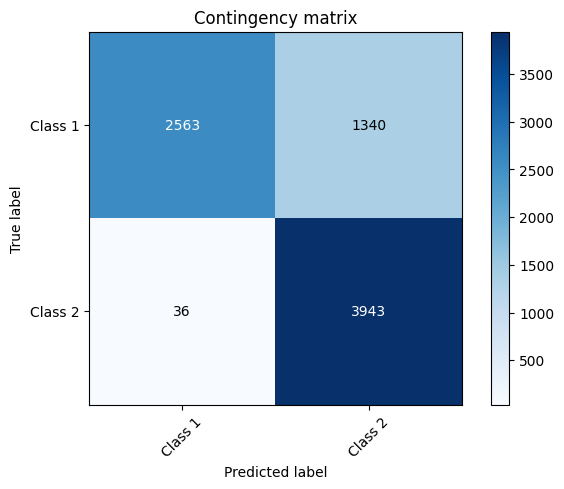

In [7]:
plot_confusion_matrix(cm, classes=['Class 1', 'Class 2'])

In [8]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

# Homogeneity
homogeneity = homogeneity_score(labels, kmeans.labels_)

# Completeness
completeness = completeness_score(labels, kmeans.labels_)

# V-Measure
v_measure = v_measure_score(labels, kmeans.labels_)

# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(labels, kmeans.labels_)

#Adjusted Mutual Information Score (AMI Score)
ami = adjusted_mutual_info_score(labels, kmeans.labels_)

print("Homogeneity Score:", homogeneity)
print("Completeness Score:", completeness)
print("V-Measure Score:", v_measure)
print("Adjusted Rand Index (ARI):", ari)
print("Adjusted Mutual Information (AMI) Score:", ami)

Homogeneity Score: 0.41761421534460047
Completeness Score: 0.45654845188009097
V-Measure Score: 0.43621428973628196
Adjusted Rand Index (ARI): 0.4235348988973707
Adjusted Mutual Information (AMI) Score: 0.436160374118428


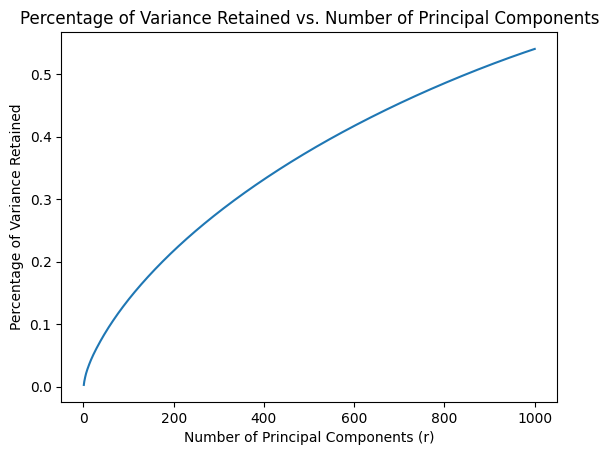

In [9]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 1000)
svd.fit(tfidf_vectors)

cumulative_variance_ratio = np.cumsum(svd.explained_variance_ratio_)

# Plot variance
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Principal Components (r)')
plt.ylabel('Percentage of Variance Retained')
plt.title('Percentage of Variance Retained vs. Number of Principal Components')
plt.show()

In [15]:
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

# R Values
r_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 300]

# Lists to store evaluation metrics for SVD
svd_homogeneity_scores = []
svd_completeness_scores = []
svd_v_measure_scores = []
svd_ari_scores = []
svd_ami_scores = []

# Lists to store evaluation metrics for NMF
nmf_homogeneity_scores = []
nmf_completeness_scores = []
nmf_v_measure_scores = []
nmf_ari_scores = []
nmf_ami_scores = []

for r in r_values:

    # Print status
    print('Testing SVD for r = ', r)

    # Reduce dimensionality - Truncated SVD (PCA)
    svd = TruncatedSVD(n_components = r)
    svd_data = svd.fit_transform(tfidf_vectors)  

    # K-means Clustering (w/SVD)
    kmeans_svd = KMeans(n_clusters = 2, random_state = 0, max_iter = 1000, n_init = 30)
    kmeans_svd.fit(svd_data)

    # SVD Evaluation Metrics
    svd_homogeneity = homogeneity_score(labels, kmeans_svd.labels_)
    svd_completeness = completeness_score(labels, kmeans_svd.labels_)
    svd_v_measure = v_measure_score(labels, kmeans_svd.labels_)
    svd_adjusted_rand = adjusted_rand_score(labels, kmeans_svd.labels_)
    svd_adjusted_mutual_info = adjusted_mutual_info_score(labels, kmeans_svd.labels_)

    # Append Scores
    svd_homogeneity_scores.append(svd_homogeneity)
    svd_completeness_scores.append(svd_completeness)
    svd_v_measure_scores.append(svd_v_measure)
    svd_ari_scores.append(svd_adjusted_rand)
    svd_ami_scores.append(svd_adjusted_mutual_info)

    # Print status
    print('Testing NMF for r = ', r)
    
    # Reduce dimensionality - NMF
    nmf = NMF(n_components = r)
    nmf_data = nmf.fit_transform(tfidf_vectors)
    
    # K-means Clustering (w/NMF)
    kmeans_nmf = KMeans(n_clusters = 2, random_state = 0, max_iter = 1000, n_init = 30)
    kmeans_nmf.fit(nmf_data)
    
    # NMF Evaluation Metrics
    nmf_homogeneity = homogeneity_score(labels, kmeans_nmf.labels_)
    nmf_completeness = completeness_score(labels, kmeans_nmf.labels_)
    nmf_v_measure = v_measure_score(labels, kmeans_nmf.labels_)
    nmf_adjusted_rand = adjusted_rand_score(labels, kmeans_nmf.labels_)
    nmf_adjusted_mutual_info = adjusted_mutual_info_score(labels, kmeans_nmf.labels_)

    # Append Scores
    nmf_homogeneity_scores.append(nmf_homogeneity)
    nmf_completeness_scores.append(nmf_completeness)
    nmf_v_measure_scores.append(nmf_v_measure)
    nmf_ari_scores.append(nmf_adjusted_rand)
    nmf_ami_scores.append(nmf_adjusted_mutual_info)

Testing SVD for r =  1
Testing NMF for r =  1
Testing SVD for r =  2
Testing NMF for r =  2
Testing SVD for r =  3
Testing NMF for r =  3
Testing SVD for r =  4
Testing NMF for r =  4
Testing SVD for r =  5
Testing NMF for r =  5
Testing SVD for r =  6
Testing NMF for r =  6
Testing SVD for r =  7
Testing NMF for r =  7
Testing SVD for r =  8
Testing NMF for r =  8
Testing SVD for r =  9
Testing NMF for r =  9
Testing SVD for r =  10
Testing NMF for r =  10
Testing SVD for r =  20
Testing NMF for r =  20
Testing SVD for r =  50
Testing NMF for r =  50
Testing SVD for r =  100
Testing NMF for r =  100
Testing SVD for r =  300
Testing NMF for r =  300


/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


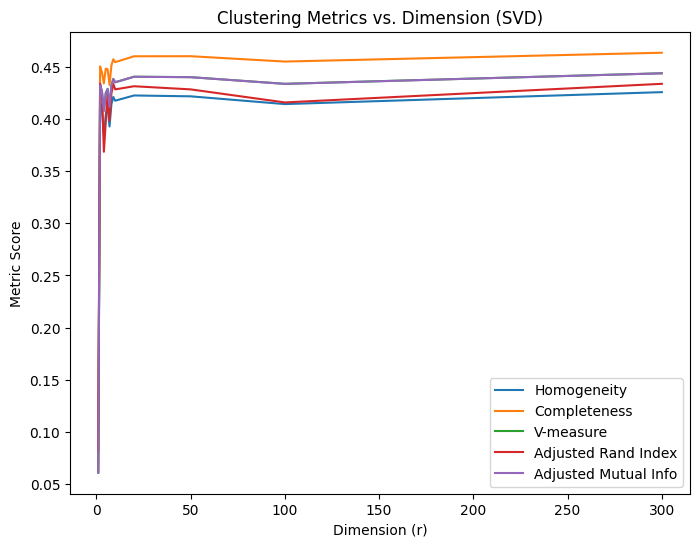

In [16]:
import matplotlib.pyplot as plt

# Plot the scores vs. r for SVD
plt.figure(figsize=(8, 6))

for metric, scores in svd_scores.items():
    plt.plot(r_values, scores, label=metric)

plt.title('Clustering Metrics vs. Dimension (SVD)')
plt.xlabel('Dimension (r)')
plt.ylabel('Metric Score')
plt.legend()
plt.show()

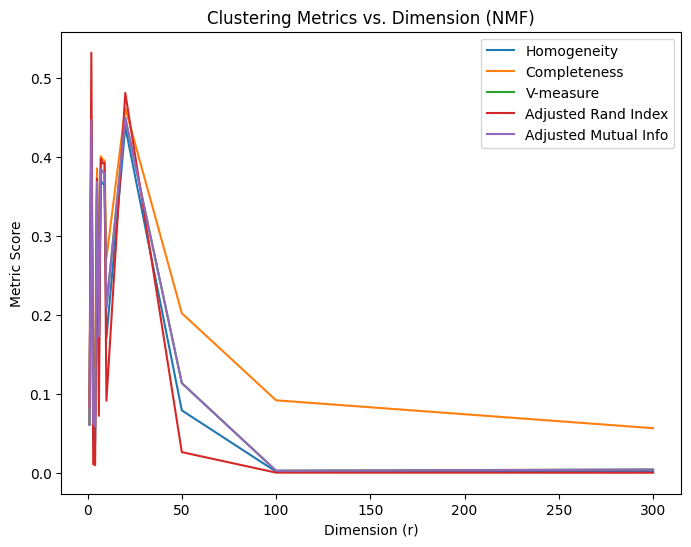

In [17]:
# Plot the scores vs. r for NMF
plt.figure(figsize=(8, 6))
for metric, scores in nmf_scores.items():
    plt.plot(r_values, scores, label=metric)

plt.title('Clustering Metrics vs. Dimension (NMF)')
plt.xlabel('Dimension (r)')
plt.ylabel('Metric Score')
plt.legend()
plt.show()

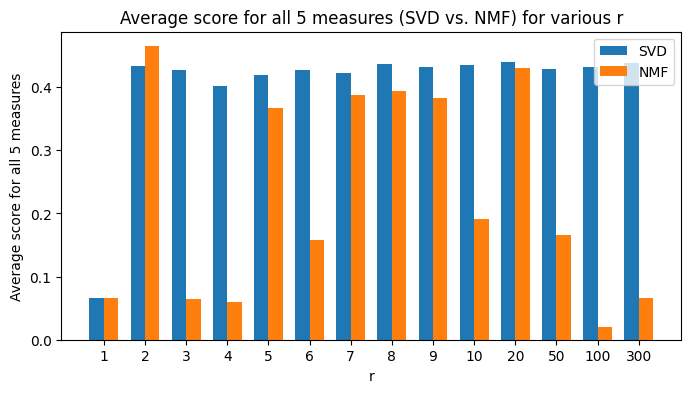

Max SVD Score: 0.4399533227710659 at r = 20
Max NMF Score: 0.46451630864402194 at r = 2


In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Average SVD Scores
svd_average_scores = [np.mean(score) for score in zip(svd_homogeneity_scores, svd_completeness_scores, svd_v_measure_scores, svd_ari_scores, svd_ami_scores)]

# Average NMF Scores
nmf_average_scores = [np.mean(score) for score in zip(nmf_homogeneity_scores, nmf_completeness_scores, nmf_v_measure_scores, nmf_ari_scores, nmf_ami_scores)]

# Plot average scores for all 5 measures for SVD and NMF
fig, ax = plt.subplots(figsize=(8, 4))
width = 0.35
rects1 = ax.bar(np.arange(len(r_values)) - width/2, svd_average_scores, width, label = 'SVD')
rects2 = ax.bar(np.arange(len(r_values)) + width/2, nmf_average_scores, width, label = 'NMF')

# Plot
ax.set_ylabel('Average score for all 5 measures')
ax.set_title('Average score for all 5 measures (SVD vs. NMF) for various r')
ax.set_xticks(np.arange(len(r_values)))
ax.set_xticklabels(r_values)
ax.set_xlabel('r')
ax.legend()
plt.show()

# Find the largest average score and its corresponding r value for SVD and NMF (best r value)
max_svd_score = max(svd_average_scores)
max_svd_r = r_values[svd_average_scores.index(max_svd_score)]
max_nmf_score = max(nmf_average_scores)
max_nmf_r = r_values[nmf_average_scores.index(max_nmf_score)]

# Print the largest average scores and their corresponding r values
print("Max SVD Score:", max_svd_score, "at r =", max_svd_r)
print("Max NMF Score:", max_nmf_score, "at r =", max_nmf_r)

In [20]:
# Find the index of the best r value for SVD and NMF
best_svd_index = svd_average_scores.index(max_svd_score)
best_nmf_index = nmf_average_scores.index(max_nmf_score)

# Get the evaluation metrics for the best r values
best_svd_metrics = [svd_homogeneity_scores[best_svd_index], svd_completeness_scores[best_svd_index], svd_v_measure_scores[best_svd_index], svd_ari_scores[best_svd_index], svd_ami_scores[best_svd_index]]
best_nmf_metrics = [nmf_homogeneity_scores[best_nmf_index], nmf_completeness_scores[best_nmf_index], nmf_v_measure_scores[best_nmf_index], nmf_ari_scores[best_nmf_index], nmf_ami_scores[best_nmf_index]]

# Print the evaluation metrics for the best r values
print("Evaluation metrics for the best r value of SVD (r =", max_svd_r, "):")
print("Homogeneity Score:", best_svd_metrics[0])
print("Completeness Score:", best_svd_metrics[1])
print("V-measure Score:", best_svd_metrics[2])
print("Adjusted Rand Index:", best_svd_metrics[3])
print("Adjusted Mutual Info Score:", best_svd_metrics[4])

print()

print("Evaluation metrics for the best r value of NMF (r =", max_nmf_r, "):")
print("Homogeneity Score:", best_nmf_metrics[0])
print("Completeness Score:", best_nmf_metrics[1])
print("V-measure Score:", best_nmf_metrics[2])
print("Adjusted Rand Index:", best_nmf_metrics[3])
print("Adjusted Mutual Info Score:", best_nmf_metrics[4])

Evaluation metrics for the best r value of SVD (r = 20 ):
Homogeneity Score: 0.4234439049486913
Completeness Score: 0.4606652071020137
V-measure Score: 0.44127104112028864
Adjusted Rand Index: 0.43316872674254586
Adjusted Mutual Info Score: 0.44121773394179015

Evaluation metrics for the best r value of NMF (r = 2 ):
Homogeneity Score: 0.44507091814662897
Completeness Score: 0.4500106879198462
V-measure Score: 0.44752717225072175
Adjusted Rand Index: 0.5324964510545308
Adjusted Mutual Info Score: 0.4474763138483818


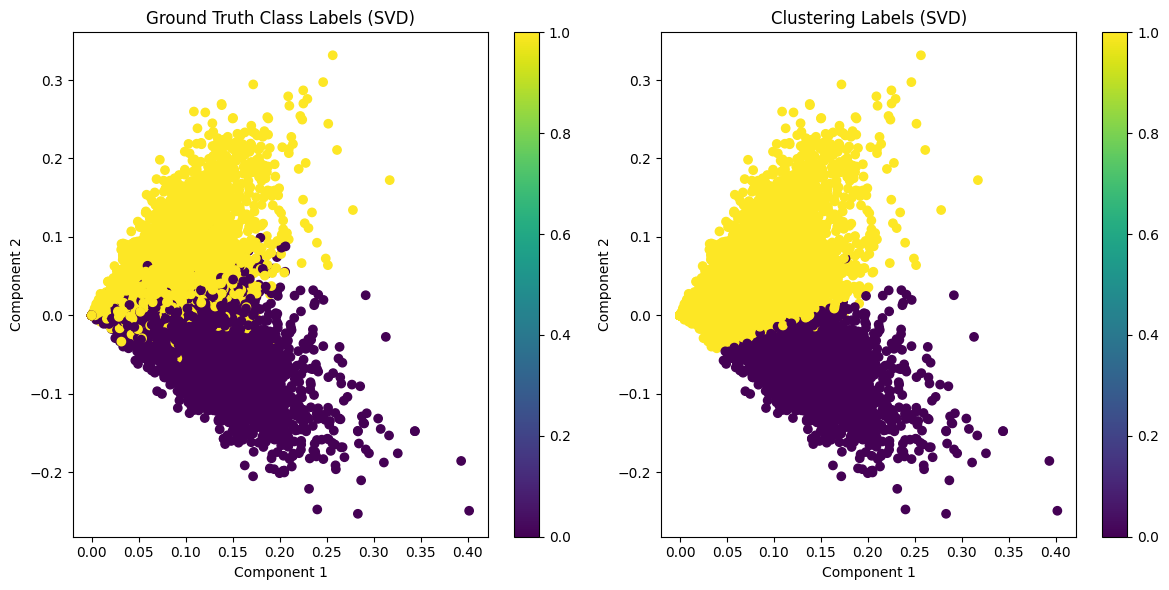

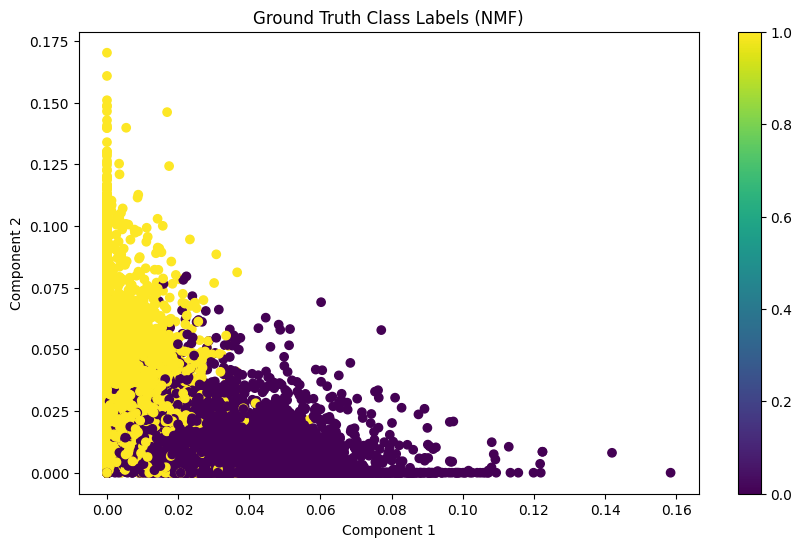

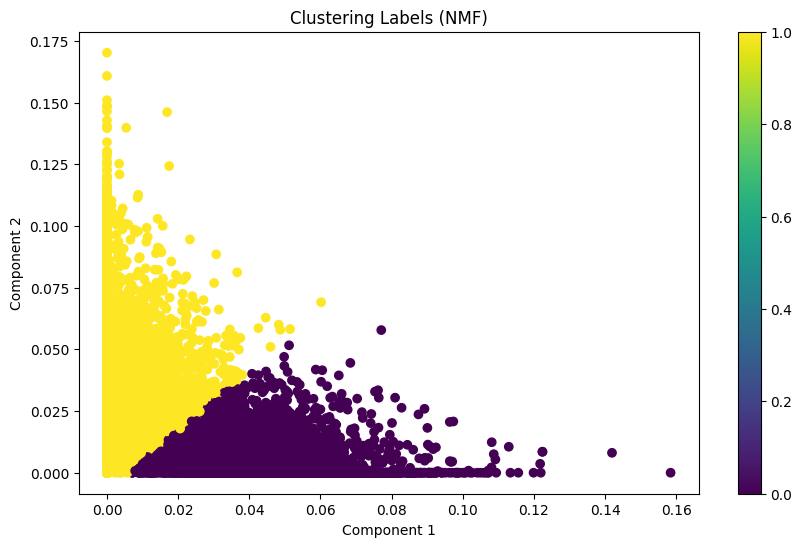

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.cluster import KMeans

# Define the optimal choice of r for SVD and NMF
optimal_r_svd = svd_average_scores.index(max_svd_score) + 1
optimal_r_nmf = nmf_average_scores.index(max_nmf_score) + 1

# Initialize TruncatedSVD and NMF with optimal r values
svd = TruncatedSVD(n_components=optimal_r_svd)
nmf = NMF(n_components=optimal_r_nmf)

# Fit and transform data with SVD and NMF
svd_data = svd.fit_transform(tfidf_vectors)
nmf_data = nmf.fit_transform(tfidf_vectors)

# Perform K-Means clustering
kmeans_svd = KMeans(n_clusters=2, random_state=0)
kmeans_nmf = KMeans(n_clusters=2, random_state=0)

# Fit K-Means to the dimension-reduced data
kmeans_svd.fit(svd_data)
kmeans_nmf.fit(nmf_data)

# Project data onto 2-D plane using SVD and NMF
svd_projection = svd.transform(tfidf_vectors)
nmf_projection = nmf.transform(tfidf_vectors)

# Plot clustering results for SVD
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(svd_projection[:, 0], svd_projection[:, 1], c=labels, cmap='viridis')
plt.title('Ground Truth Class Labels (SVD)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(svd_projection[:, 0], svd_projection[:, 1], c=kmeans_svd.labels_, cmap='viridis')
plt.title('Clustering Labels (SVD)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()

plt.tight_layout()
plt.show()

# Plot clustering results for NMF
plt.figure(figsize=(10, 6))
plt.scatter(nmf_projection[:, 0], nmf_projection[:, 1], c=labels, cmap='viridis')
plt.title('Ground Truth Class Labels (NMF)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(nmf_projection[:, 0], nmf_projection[:, 1], c=kmeans_nmf.labels_, cmap='viridis')
plt.title('Clustering Labels (NMF)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load documents for all 20 categories
newsgroups_data = fetch_20newsgroups(subset = 'all', random_state = 0)

# Convert documents to TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df = 3)
tfidf_vectors = tfidf_vectorizer.fit_transform(newsgroups_data.data)

# Define the number of clusters
n_clusters = 20

# Define the list of r values to try
r_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 300]

# Initialize lists to store metric scores for SVD and NMF
svd_scores = {'Homogeneity': [], 'Completeness': [], 'V-measure': [], 'Adjusted Rand Index': [], 'Adjusted Mutual Info': []}
nmf_scores = {'Homogeneity': [], 'Completeness': [], 'V-measure': [], 'Adjusted Rand Index': [], 'Adjusted Mutual Info': []}

# Loop over each value of r
for r in r_values:

    # Print status
    print('Testing SVD for r = ', r)

    # Reduce dimensionality using Truncated SVD (PCA)
    svd = TruncatedSVD(n_components=r, random_state=0)
    svd_data = svd.fit_transform(tfidf_vectors)  

    # Calculate K-means clustering for SVD-reduced data
    kmeans_svd = KMeans(n_clusters=n_clusters, random_state=0, max_iter=1000, n_init=30)
    kmeans_svd.fit(svd_data)

    # Calculate clustering purity metrics for SVD
    svd_homogeneity = homogeneity_score(newsgroups_data.target, kmeans_svd.labels_)
    svd_completeness = completeness_score(newsgroups_data.target, kmeans_svd.labels_)
    svd_v_measure = v_measure_score(newsgroups_data.target, kmeans_svd.labels_)
    svd_adjusted_rand = adjusted_rand_score(newsgroups_data.target, kmeans_svd.labels_)
    svd_adjusted_mutual_info = adjusted_mutual_info_score(newsgroups_data.target, kmeans_svd.labels_)

    # Append scores to lists for SVD
    svd_scores['Homogeneity'].append(svd_homogeneity)
    svd_scores['Completeness'].append(svd_completeness)
    svd_scores['V-measure'].append(svd_v_measure)
    svd_scores['Adjusted Rand Index'].append(svd_adjusted_rand)
    svd_scores['Adjusted Mutual Info'].append(svd_adjusted_mutual_info)

    # Print status
    print('Testing NMF for r = ', r)
    
    # Reduce dimensionality using NMF
    nmf = NMF(n_components=r, random_state=0)
    nmf_data = nmf.fit_transform(tfidf_vectors)
    
    # Calculate K-means clustering for NMF-reduced data
    kmeans_nmf = KMeans(n_clusters=n_clusters, random_state=0, max_iter=1000, n_init=30)
    kmeans_nmf.fit(nmf_data)
    
    # Calculate clustering purity metrics for NMF
    nmf_homogeneity = homogeneity_score(newsgroups_data.target, kmeans_nmf.labels_)
    nmf_completeness = completeness_score(newsgroups_data.target, kmeans_nmf.labels_)
    nmf_v_measure = v_measure_score(newsgroups_data.target, kmeans_nmf.labels_)
    nmf_adjusted_rand = adjusted_rand_score(newsgroups_data.target, kmeans_nmf.labels_)
    nmf_adjusted_mutual_info = adjusted_mutual_info_score(newsgroups_data.target, kmeans_nmf.labels_)

    # Append scores to lists for NMF
    nmf_scores['Homogeneity'].append(nmf_homogeneity)
    nmf_scores['Completeness'].append(nmf_completeness)
    nmf_scores['V-measure'].append(nmf_v_measure)
    nmf_scores['Adjusted Rand Index'].append(nmf_adjusted_rand)
    nmf_scores['Adjusted Mutual Info'].append(nmf_adjusted_mutual_info)

Testing SVD for r =  1
Testing NMF for r =  1
Testing SVD for r =  2
Testing NMF for r =  2
Testing SVD for r =  3
Testing NMF for r =  3


/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Testing SVD for r =  4
Testing NMF for r =  4
Testing SVD for r =  5
Testing NMF for r =  5
Testing SVD for r =  6
Testing NMF for r =  6
Testing SVD for r =  7
Testing NMF for r =  7
Testing SVD for r =  8
Testing NMF for r =  8
Testing SVD for r =  9
Testing NMF for r =  9
Testing SVD for r =  10
Testing NMF for r =  10
Testing SVD for r =  20
Testing NMF for r =  20
Testing SVD for r =  50
Testing NMF for r =  50
Testing SVD for r =  100
Testing NMF for r =  100
Testing SVD for r =  300
Testing NMF for r =  300


/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


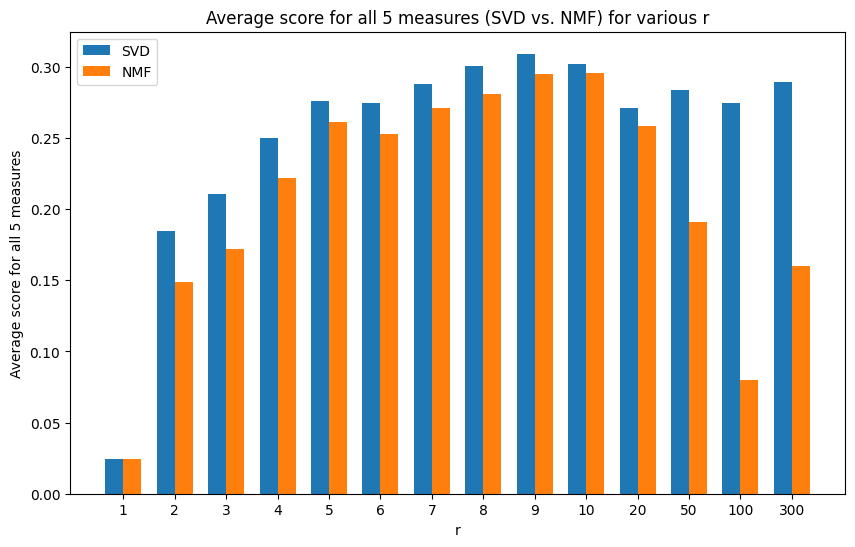

Best r value for SVD: 9
Best r value for NMF: 10


In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average scores for SVD
svd_average_scores = [np.mean(score) for score in zip(*[svd_scores[metric] for metric in svd_scores.keys()])]

# Calculate average scores for NMF
nmf_average_scores = [np.mean(score) for score in zip(*[nmf_scores[metric] for metric in nmf_scores.keys()])]

# Define width for bars
width = 0.35

# Plot average scores for all 5 measures for SVD and NMF
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(np.arange(len(r_values)) - width/2, svd_average_scores, width, label='SVD')
rects2 = ax.bar(np.arange(len(r_values)) + width/2, nmf_average_scores, width, label='NMF')

# Add labels and title
ax.set_ylabel('Average score for all 5 measures')
ax.set_title('Average score for all 5 measures (SVD vs. NMF) for various r')
ax.set_xticks(np.arange(len(r_values)))
ax.set_xticklabels(r_values)
ax.set_xlabel('r')
ax.legend()

plt.show()

# Find the best r values for SVD and NMF
max_svd_score = max(svd_average_scores)
max_svd_r = r_values[svd_average_scores.index(max_svd_score)]
max_nmf_score = max(nmf_average_scores)
max_nmf_r = r_values[nmf_average_scores.index(max_nmf_score)]

print("Best r value for SVD:", max_svd_r)
print("Best r value for NMF:", max_nmf_r)

/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Clustering Metrics for SVD:
Homogeneity Score: 0.25762380069949004
Completeness Score: 0.2930943066505179
V-measure Score: 0.2742167662001323
Adjusted Rand Index: 0.08220070867454365
Adjusted Mutual Info Score: 0.271706616464799

Clustering Metrics for NMF:
Homogeneity Score: 0.2562941261665178
Completeness Score: 0.297306107908675
V-measure Score: 0.2752809859544703
Adjusted Rand Index: 0.07803155758473546
Adjusted Mutual Info Score: 0.2727491111160075


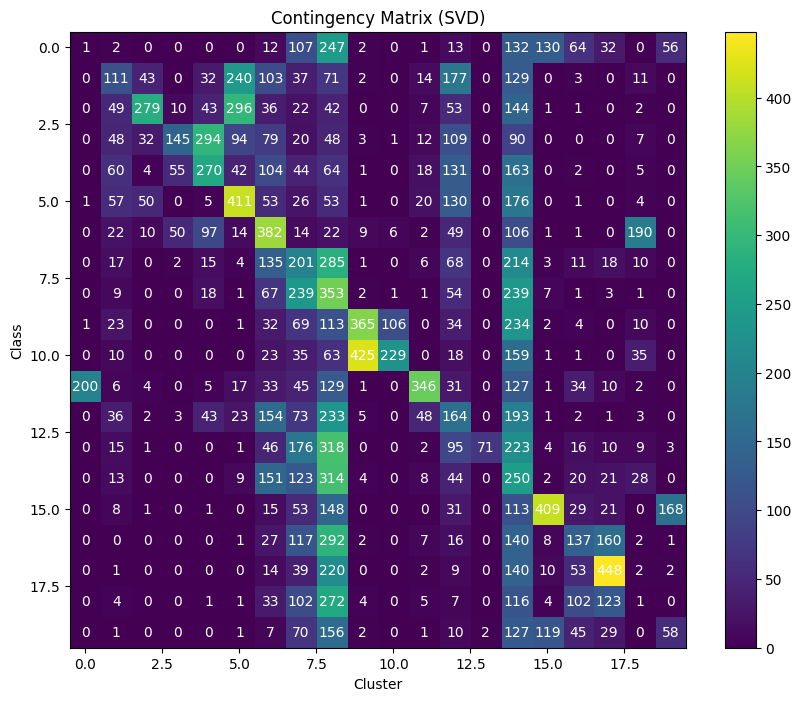

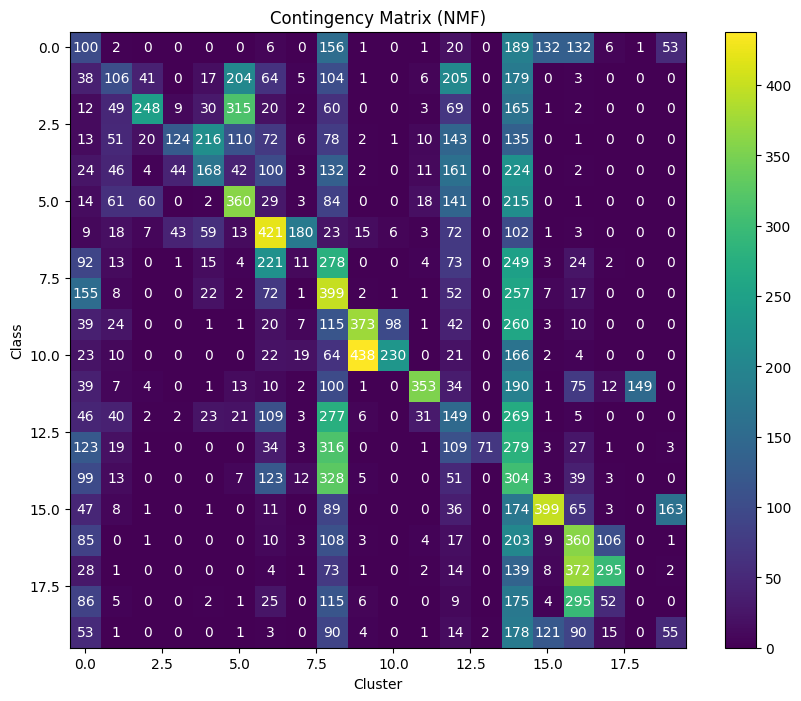

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load documents for all 20 categories
newsgroups_data = fetch_20newsgroups(subset='all', random_state = 0, 
                                     remove = ('headers', 'footers', 'quotes'))

# Convert documents to TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 3)
tfidf_vectors = tfidf_vectorizer.fit_transform(newsgroups_data.data)

# Define the number of clusters
n_clusters = 20

# Define the best r values
best_r_svd = 9
best_r_nmf = 10

# Reduce dimensionality using Truncated SVD (PCA) with the best r value
svd = TruncatedSVD(n_components = best_r_svd, random_state = 0)
svd_data = svd.fit_transform(tfidf_vectors)

# Reduce dimensionality using NMF with the best r value
nmf = NMF(n_components = best_r_nmf, random_state = 0)
nmf_data = nmf.fit_transform(tfidf_vectors)

# Perform K-Means clustering with k=20 for both SVD and NMF
kmeans_svd = KMeans(n_clusters = n_clusters, random_state = 0, max_iter = 1000, n_init = 30)
kmeans_nmf = KMeans(n_clusters = n_clusters, random_state = 0, max_iter = 1000, n_init = 30)

# Fit K-Means to the dimension-reduced data
kmeans_svd.fit(svd_data)
kmeans_nmf.fit(nmf_data)

# Calculate clustering metrics for SVD
svd_homogeneity = homogeneity_score(newsgroups_data.target, kmeans_svd.labels_)
svd_completeness = completeness_score(newsgroups_data.target, kmeans_svd.labels_)
svd_v_measure = v_measure_score(newsgroups_data.target, kmeans_svd.labels_)
svd_ari = adjusted_rand_score(newsgroups_data.target, kmeans_svd.labels_)
svd_ami = adjusted_mutual_info_score(newsgroups_data.target, kmeans_svd.labels_)

# Calculate clustering metrics for NMF
nmf_homogeneity = homogeneity_score(newsgroups_data.target, kmeans_nmf.labels_)
nmf_completeness = completeness_score(newsgroups_data.target, kmeans_nmf.labels_)
nmf_v_measure = v_measure_score(newsgroups_data.target, kmeans_nmf.labels_)
nmf_ari = adjusted_rand_score(newsgroups_data.target, kmeans_nmf.labels_)
nmf_ami = adjusted_mutual_info_score(newsgroups_data.target, kmeans_nmf.labels_)

# Print clustering metrics for SVD
print("Clustering Metrics for SVD:")
print("Homogeneity Score:", svd_homogeneity)
print("Completeness Score:", svd_completeness)
print("V-measure Score:", svd_v_measure)
print("Adjusted Rand Index:", svd_ari)
print("Adjusted Mutual Info Score:", svd_ami)

# Print clustering metrics for NMF
print("\nClustering Metrics for NMF:")
print("Homogeneity Score:", nmf_homogeneity)
print("Completeness Score:", nmf_completeness)
print("V-measure Score:", nmf_v_measure)
print("Adjusted Rand Index:", nmf_ari)
print("Adjusted Mutual Info Score:", nmf_ami)

# Calculate contingency matrix for SVD
cm_svd = confusion_matrix(newsgroups_data.target, kmeans_svd.labels_)

# Calculate contingency matrix for NMF
cm_nmf = confusion_matrix(newsgroups_data.target, kmeans_nmf.labels_)

# Reorder the contingency matrix for SVD
rows_svd, cols_svd = linear_sum_assignment(cm_svd, maximize = True)
cm_svd_reordered = cm_svd[rows_svd[:, np.newaxis], cols_svd]

# Reorder the contingency matrix for NMF
rows_nmf, cols_nmf = linear_sum_assignment(cm_nmf, maximize = True)
cm_nmf_reordered = cm_nmf[rows_nmf[:, np.newaxis], cols_nmf]


# Plot contingency matrix for SVD
plt.figure(figsize=(10, 8))
plt.imshow(cm_svd_reordered, interpolation = 'nearest', cmap = 'viridis')
plt.title('Contingency Matrix (SVD)')
plt.colorbar()
plt.xlabel('Cluster')
plt.ylabel('Class')

# Display numbers within the matrix
for i in range(cm_svd_reordered.shape[0]):
    for j in range(cm_svd_reordered.shape[1]):
        plt.text(j, i, cm_svd_reordered[i, j], ha = 'center', va = 'center', color = 'white')

plt.show()

# Plot contingency matrix for NMF
plt.figure(figsize=(10, 8))
plt.imshow(cm_nmf_reordered, interpolation = 'nearest', cmap = 'viridis')
plt.title('Contingency Matrix (NMF)')
plt.colorbar()
plt.xlabel('Cluster')
plt.ylabel('Class')

# Display numbers within the matrix
for i in range(cm_nmf_reordered.shape[0]):
    for j in range(cm_nmf_reordered.shape[1]):
        plt.text(j, i, cm_nmf_reordered[i, j], ha = 'center', va = 'center', color = 'white')

plt.show()

Processing UMAP with n_components=5 and metric=cosine


/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Homogeneity Score: 0.4450588001432251
Completeness Score: 0.4604871895076467
V-measure Score: 0.4526415629594122
Adjusted Rand Index: 0.3048255852775483
Adjusted Mutual Info Score: 0.4508426669249134


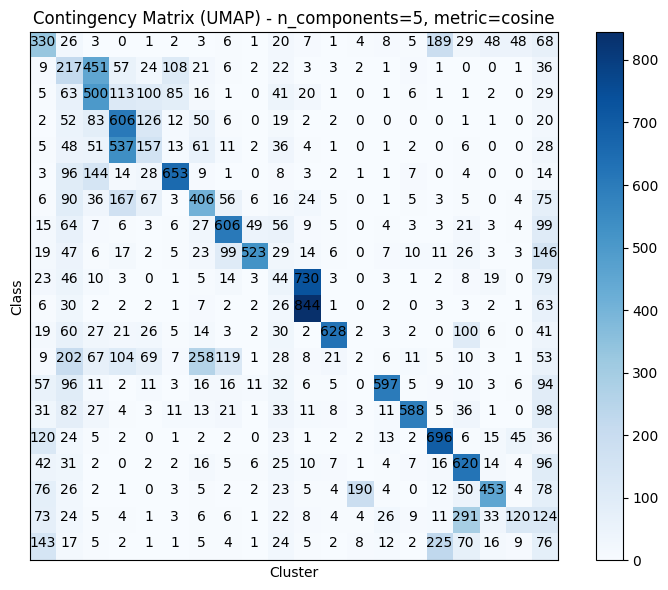

Processing UMAP with n_components=5 and metric=euclidean


/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Homogeneity Score: 0.009635168827398483
Completeness Score: 0.010336031503545472
V-measure Score: 0.00997330224439873
Adjusted Rand Index: 0.000658988333000893
Adjusted Mutual Info Score: 0.006587254598491079


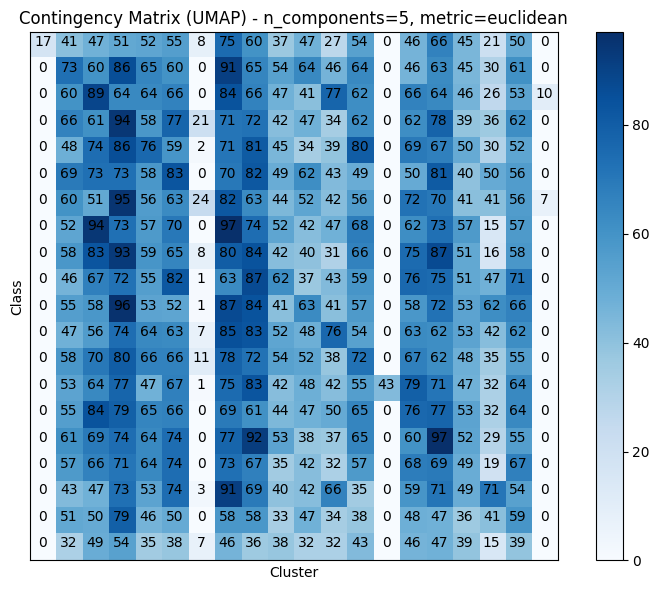

Processing UMAP with n_components=20 and metric=cosine


/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Homogeneity Score: 0.4607782308466331
Completeness Score: 0.47075338714725573
V-measure Score: 0.4657124003196114
Adjusted Rand Index: 0.3330203564800391
Adjusted Mutual Info Score: 0.46396871931249933


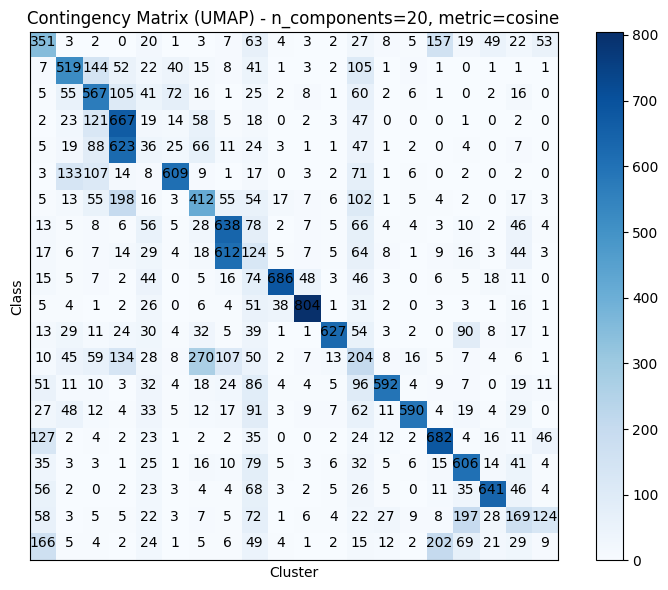

Processing UMAP with n_components=20 and metric=euclidean


/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Homogeneity Score: 0.009270967906286573
Completeness Score: 0.010173779808519594
V-measure Score: 0.009701415258639857
Adjusted Rand Index: 0.0007053457432108811
Adjusted Mutual Info Score: 0.0062725207040595695


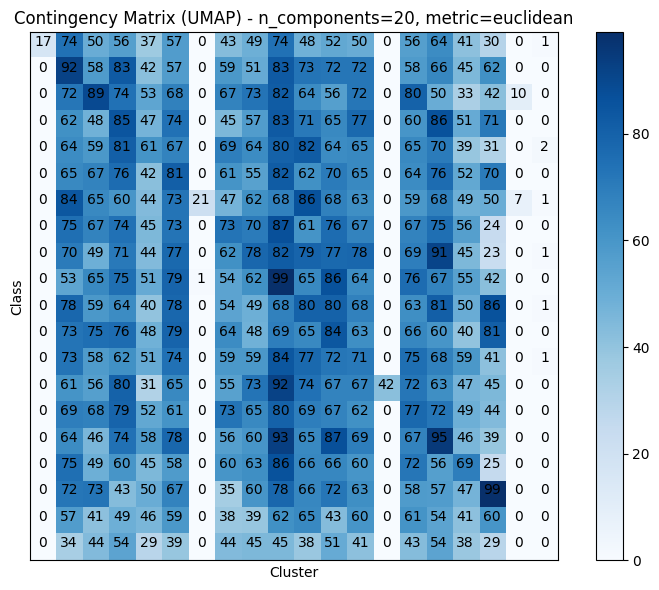

Processing UMAP with n_components=200 and metric=cosine


/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Homogeneity Score: 0.44087129102095357
Completeness Score: 0.4606133749037935
V-measure Score: 0.4505261618555487
Adjusted Rand Index: 0.3039403290004576
Adjusted Mutual Info Score: 0.4487103380398301


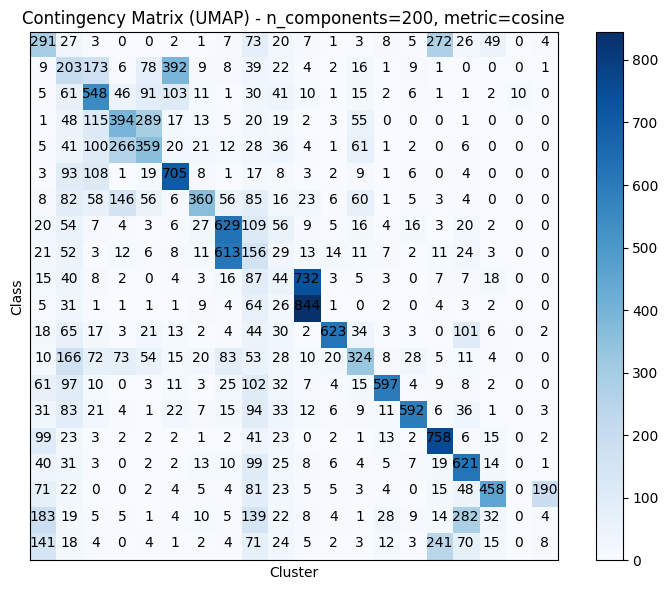

Processing UMAP with n_components=200 and metric=euclidean


/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Homogeneity Score: 0.0097336451268206
Completeness Score: 0.01098853809386461
V-measure Score: 0.010323094736606718
Adjusted Rand Index: 0.0007616193947923143
Adjusted Mutual Info Score: 0.0068871505594474474


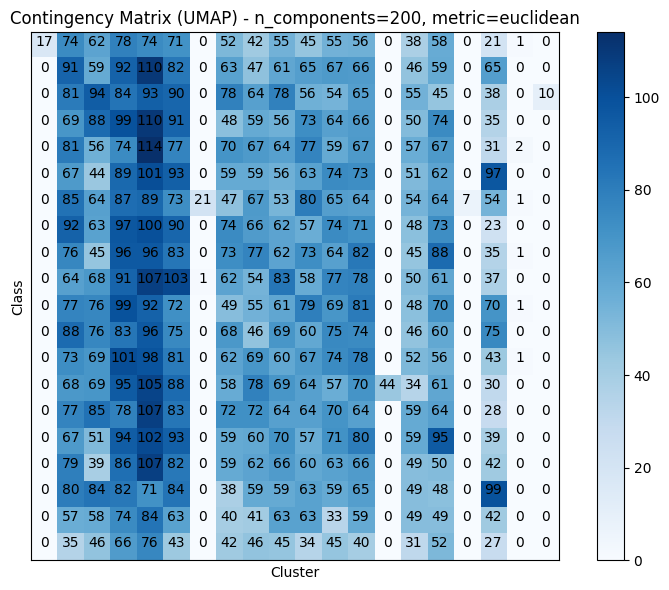

In [25]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
from umap import UMAP
from scipy.optimize import linear_sum_assignment
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Load documents for all 20 categories
newsgroups_data = fetch_20newsgroups(subset = 'all', random_state = 0, 
                                     remove = ('headers', 'footers', 'quotes'))

# Define UMAP settings
n_components_values = [5, 20, 200]
metric_values = ['cosine', 'euclidean']

# Define colors
cmap = plt.cm.Blues  # Colormap for the matrix

for n_components in n_components_values:
    for metric in metric_values:
        print(f"Processing UMAP with n_components = {n_components} and metric = {metric}")

        # Reduce dimensionality using UMAP
        umap = UMAP(n_components = n_components, metric = metric, random_state = 0)
        umap_data = umap.fit_transform(tfidf_vectors)

        # Perform K-Means clustering with k=20
        kmeans_umap = KMeans(n_clusters = 20, random_state = 0)
        kmeans_umap.fit(umap_data)

        # Calculate clustering metrics
        homogeneity = homogeneity_score(newsgroups_data.target, kmeans_umap.labels_)
        completeness = completeness_score(newsgroups_data.target, kmeans_umap.labels_)
        v_measure = v_measure_score(newsgroups_data.target, kmeans_umap.labels_)
        adjusted_rand = adjusted_rand_score(newsgroups_data.target, kmeans_umap.labels_)
        adjusted_mutual_info = adjusted_mutual_info_score(newsgroups_data.target, kmeans_umap.labels_)

        # Print clustering metrics
        print("Homogeneity Score:", homogeneity)
        print("Completeness Score:", completeness)
        print("V-measure Score:", v_measure)
        print("Adjusted Rand Index:", adjusted_rand)
        print("Adjusted Mutual Info Score:", adjusted_mutual_info)

        # Calculate contingency matrix
        cm_umap = confusion_matrix(newsgroups_data.target, kmeans_umap.labels_)

        # Reorder the contingency matrix
        rows_umap, cols_umap = linear_sum_assignment(cm_umap, maximize = True)
        cm_umap_reordered = cm_umap[rows_umap[:, np.newaxis], cols_umap]

        # Plot contingency matrix with annotations
        plt.figure(figsize=(8, 6))
        plt.imshow(cm_umap_reordered, interpolation = 'nearest', cmap = cmap)
        plt.title(f'Contingency Matrix (UMAP) - n_components = {n_components}, metric = {metric}')
        plt.colorbar()
        plt.xlabel('Cluster')
        plt.ylabel('Class')

        # Annotate each cell with its value
        for i in range(cm_umap_reordered.shape[0]):
            for j in range(cm_umap_reordered.shape[1]):
                plt.text(j, i, format(cm_umap_reordered[i, j], 'd'), horizontalalignment = "center", color = "black")

        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
        plt.show()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
from umap import UMAP

# Load documents for all 20 categories
newsgroups_data = fetch_20newsgroups(subset='all', random_state = 0)

# Convert documents to TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 3)
tfidf_vectors = tfidf_vectorizer.fit_transform(newsgroups_data.data)

# Reduce dimensionality using UMAP
umap_reducer = UMAP(n_components = 2, random_state = 0)
umap_data = umap_reducer.fit_transform(tfidf_vectors)

# Perform Agglomerative clustering with ward linkage
agg_clustering_ward = AgglomerativeClustering(n_clusters = 20, linkage = 'ward')
agg_labels_ward = agg_clustering_ward.fit_predict(umap_data)

# Perform Agglomerative clustering with single linkage
agg_clustering_single = AgglomerativeClustering(n_clusters = 20, linkage = 'single')
agg_labels_single = agg_clustering_single.fit_predict(umap_data)

# Calculate clustering metrics for Agglomerative clustering with ward linkage
ward_homogeneity = homogeneity_score(newsgroups_data.target, agg_labels_ward)
ward_completeness = completeness_score(newsgroups_data.target, agg_labels_ward)
ward_v_measure = v_measure_score(newsgroups_data.target, agg_labels_ward)
ward_ari = adjusted_rand_score(newsgroups_data.target, agg_labels_ward)
ward_ami = adjusted_mutual_info_score(newsgroups_data.target, agg_labels_ward)

# Calculate clustering metrics for Agglomerative clustering with single linkage
single_homogeneity = homogeneity_score(newsgroups_data.target, agg_labels_single)
single_completeness = completeness_score(newsgroups_data.target, agg_labels_single)
single_v_measure = v_measure_score(newsgroups_data.target, agg_labels_single)
single_ari = adjusted_rand_score(newsgroups_data.target, agg_labels_single)
single_ami = adjusted_mutual_info_score(newsgroups_data.target, agg_labels_single)

# Print clustering metrics for Agglomerative clustering with ward linkage
print("Clustering Metrics for Agglomerative clustering with Ward linkage:")
print("Homogeneity Score:", ward_homogeneity)
print("Completeness Score:", ward_completeness)
print("V-measure Score:", ward_v_measure)
print("Adjusted Rand Index:", ward_ari)
print("Adjusted Mutual Info Score:", ward_ami)

# Print clustering metrics for Agglomerative clustering with single linkage
print("\nClustering Metrics for Agglomerative clustering with Single linkage:")
print("Homogeneity Score:", single_homogeneity)
print("Completeness Score:", single_completeness)
print("V-measure Score:", single_v_measure)
print("Adjusted Rand Index:", single_ari)
print("Adjusted Mutual Info Score:", single_ami)


/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Clustering Metrics for Agglomerative clustering with Ward linkage:
Homogeneity Score: 0.4631393371014522
Completeness Score: 0.46903127151855567
V-measure Score: 0.4660666838499431
Adjusted Rand Index: 0.3452234836068878
Adjusted Mutual Info Score: 0.46433198404394327

Clustering Metrics for Agglomerative clustering with Single linkage:
Homogeneity Score: 0.025457772792264844
Completeness Score: 0.3628254100142821
V-measure Score: 0.047577269685696956
Adjusted Rand Index: 0.0007937026271578537
Adjusted Mutual Info Score: 0.04126715522871953


In [30]:
import umap
import hdbscan
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

# #Load the 20 newsgroups dataset
newsgroups_data = fetch_20newsgroups(subset = 'all', random_state = 0)

# # Convert documents to TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 3)
tfidf_vectors = tfidf_vectorizer.fit_transform(newsgroups_data.data)

# Reduce dimensionality using UMAP
umap_reducer = umap.UMAP(n_components = 2, random_state = 0)
umap_data = umap_reducer.fit_transform(tfidf_vectors)

# Define min_cluster_sizes to vary
min_cluster_sizes = [20, 100, 200]

# Perform HDBSCAN clustering for each min_cluster_size
for min_size in min_cluster_sizes:
    # Apply HDBSCAN clustering
    hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size = min_size)
    hdbscan_labels = hdbscan_clusterer.fit_predict(umap_data)
    
    # Evaluate clustering performance
    homogeneity = homogeneity_score(newsgroups_data.target, hdbscan_labels)
    completeness = completeness_score(newsgroups_data.target, hdbscan_labels)
    v_measure = v_measure_score(newsgroups_data.target, hdbscan_labels)
    adjusted_rand = adjusted_rand_score(newsgroups_data.target, hdbscan_labels)
    adjusted_mutual_info = adjusted_mutual_info_score(newsgroups_data.target, hdbscan_labels)
    
    # Report findings
    print(f"Results for min_cluster_size = {min_size}:")
    print(f"Homogeneity Score: {homogeneity}")
    print(f"Completeness Score: {completeness}")
    print(f"V-measure Score: {v_measure}")
    print(f"Adjusted Rand Index: {adjusted_rand}")
    print(f"Adjusted Mutual Info Score: {adjusted_mutual_info}")
    print()


/opt/homebrew/Cellar/jupyterlab/4.0.7_1/libexec/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Results for min_cluster_size = 20:
Homogeneity Score: 0.431849921304019
Completeness Score: 0.3674196297265515
V-measure Score: 0.39703786533185287
Adjusted Rand Index: 0.05780389833067879
Adjusted Mutual Info Score: 0.37827188749124785

Results for min_cluster_size = 100:
Homogeneity Score: 0.01314585818933551
Completeness Score: 0.46262970026664796
V-measure Score: 0.025565266335314675
Adjusted Rand Index: 0.0005505015618693805
Adjusted Mutual Info Score: 0.02489033776119781

Results for min_cluster_size = 200:
Homogeneity Score: 0.01314585818933551
Completeness Score: 0.46262970026664796
V-measure Score: 0.025565266335314675
Adjusted Rand Index: 0.0005505015618693805
Adjusted Mutual Info Score: 0.02489033776119781



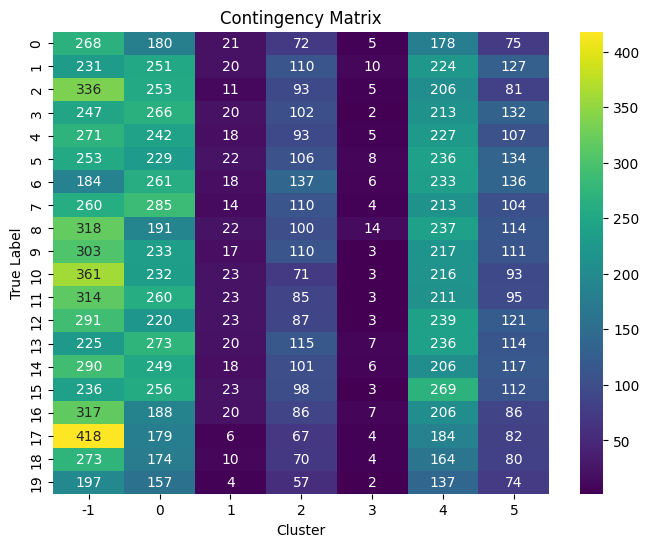

Number of Clusters: 6
Interpretation of -1 in clustering labels:
-1 indicates noise points or outliers that are not assigned to any cluster.


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extract cluster labels from the best result
clusterer_20 = hdbscan.HDBSCAN(min_cluster_size=20)
cluster_labels_20 = clusterer_20.fit_predict(umap_data)

# Plot the contingency matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(true_labels, cluster_labels), annot=True, fmt='d', cmap='viridis')
plt.title('Contingency Matrix')
plt.xlabel('Cluster')
plt.ylabel('True Label')
plt.show()

# Count the number of clusters
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print("Number of Clusters:", num_clusters)

# Interpretation of -1 in clustering labels
print("Interpretation of -1 in clustering labels:")
print("-1 indicates noise points or outliers that are not assigned to any cluster.")
